In [37]:
from collections import Counter

import numpy as np

corpus1 = open("/Users/horus/PycharmProjects/SemanticProj/data_augmented/1994.txt", "r").read().split(" ")
corpus1.append(open("/Users/horus/PycharmProjects/SemanticProj/data_augmented/2020.txt", "r").read().split(" "))
corpus2 = open("/Users/horus/PycharmProjects/SemanticProj/compare_matsci/data_augmented/1994.txt", "r").read().split(" ")
corpus2.append(open("/Users/horus/PycharmProjects/SemanticProj/compare_matsci/data_augmented/2020.txt", "r").read().split(" "))
corpus1 = list(filter(lambda x: type(x) is not list, corpus1))
corpus2 = list(filter(lambda x: type(x) is not list, corpus2))
d1 = Counter(corpus1)
d2 = Counter(corpus2)

In [40]:
corpus1 = list(filter(lambda x: d1[x] > 1000, corpus1))
corpus2 = list(filter(lambda x: d2[x] > 1000, corpus2))
common = set(corpus1).intersection(set(corpus2))
len(common)

202

In [54]:
words = list(common)[1:]

In [99]:
from gensim.models.word2vec import Word2Vec

cs_model_94 = Word2Vec.load("/Users/horus/PycharmProjects/SemanticProj/model/1994.model")
cs_model_20 = Word2Vec.load("/Users/horus/PycharmProjects/SemanticProj/model/2020.model")
mt_model_94 = Word2Vec.load("/Users/horus/PycharmProjects/SemanticProj/compare_matsci/model/1994.model")
mt_model_20 = Word2Vec.load("/Users/horus/PycharmProjects/SemanticProj/compare_matsci/model/2020.model")
en_model_94 = Word2Vec.load("/Users/horus/PycharmProjects/SemanticProj/compare_engi/model/1994.model")
en_model_20 = Word2Vec.load("/Users/horus/PycharmProjects/SemanticProj/compare_engi/model/2020.model")

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html

In [105]:
def ratio_of_same_semantic_neighbors(word, model1, model2, k = 50):
    #if word in model1.vocabulary and word in model2.vocabulary:
    ls1 = model1.wv.most_similar(word, topn=k)
    ls2 = model2.wv.most_similar(word, topn=k)
    semantic_neighbors1 = set(map(lambda x: x[0], ls1))
    semantic_neighbors2 = set(map(lambda x: x[0], ls2))
    ratio = len(semantic_neighbors1.intersection(semantic_neighbors2)) / k
    return ratio

In [106]:
ratio_of_same_semantic_neighbors("deep", cs_model_94, en_model_94), ratio_of_same_semantic_neighbors("deep", cs_model_20, en_model_20)

(0.16, 0.04)

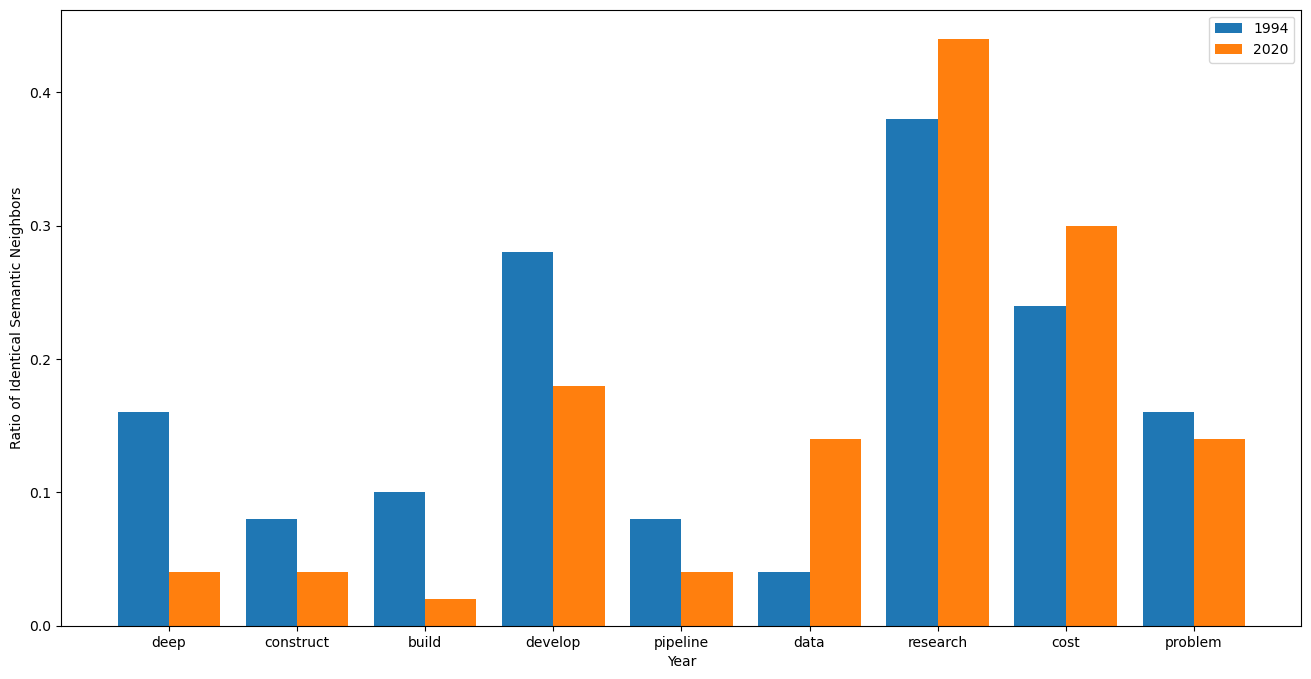

In [131]:
import numpy as np
import matplotlib.pyplot as plt


#X = words[:6]
X = ["deep", "construct", "build", "develop", "pipeline", "data", "research", "cost", "problem"]
y1 = [] # 1994
y2 = [] # 2020
for word in X:
    y1.append(ratio_of_same_semantic_neighbors(word, cs_model_94, en_model_94))
    y2.append(ratio_of_same_semantic_neighbors(word, cs_model_20, en_model_20))
X_axis = np.arange(len(X))

plt.figure(figsize=(16,8))
plt.bar(X_axis - 0.2, y1, 0.4, label = "1994")
plt.bar(X_axis + 0.2, y2, 0.4, label = "2020")
plt.xticks(X_axis, X)
plt.xlabel("Year")
plt.ylabel("Ratio of Identical Semantic Neighbors")
#plt.title("The ")
plt.legend()
plt.show()

In [ ]:
"""
import seaborn as sns

sns.set_style("white")
sns.set_palette("pastel") # "cubehelix"

g = sns.catplot(data=df, x="year", y="ratio", col="word", kind="bar"
            #, height=
            )

#g.set_titles("")
g.set_axis_labels("year", "ratio of identical neighbors")
g.set_xticklabels(["1994", "2020"])
g.set_titles("{col_name} {col_var}")
g.set(ylim = (0, 0.5))
#g.despine(left=True)

def plot_results():
    pass
"""